![dev1.jpg](imgs/dev1.jpg)

# **Exercícios de Pandas 🐼✨**

## **Lista de Exercício 7 - Pandas II**
### Fala devs, blz? 

Essa é a nossa 7ª lista de exercícios, parabéns por ter chegado até aqui! 🚀

Dessa vez, iremos fixar os conceitos aprendidos na segunda aula da biblioteca Pandas! Os exercícios a seguir abordam funções como `apply`, trabalhar com datas, agrupamentos e combinações de tabelas. Bora lá?


## 🚀 Exercício 1: Trabalhando com `apply` e `apply(lambda)`

### O que você vai fazer:
1. Crie um DataFrame com as seguintes colunas: Nome, Idade, Cidade e Salário.
   ```plaintext
   Nome: Antonio, Bernardo, Carolina, Diego
   Idade: 25, 30, 35, 28
   Cidade: São Paulo, Rio de Janeiro, Belo Horizonte, São Paulo
   Salário: 3500, 4200, 3700, 3100
   ```
2. Adicione uma nova coluna **"Faixa_Etaria"**:
   * Se a idade for menor que 30, escreva "Jovem".
   * Se estiver entre 30 e 40 (inclusive), escreva "Adulto".
   * Use ```apply``` ou ```apply(lambda)``` para fazer isso!

3. Aplique um aumento de 10% no salário e atualize os valores da coluna ```Salário```

Dica: dá pra usar ```apply(lamda)``` pra isso também!

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 1- Criação do dataframe

df_funcionarios = pd.DataFrame ({"Nome": ["Antonio", "Bernardo", "Carolina", "Diego"],
                "Idade": [25, 30, 35, 28],
                "Cidade": ["São Paulo", " Rio de Janeiro", "Belo Horizonte", "São Paulo"],
                "Salário": [3500, 4200, 3700, 3100]
                })
df_funcionarios


,Nome,Idade,Cidade,Salário
0,Antonio,25,São Paulo,3500
1,Bernardo,30,Rio de Janeiro,4200
2,Carolina,35,Belo Horizonte,3700
3,Diego,28,São Paulo,3100


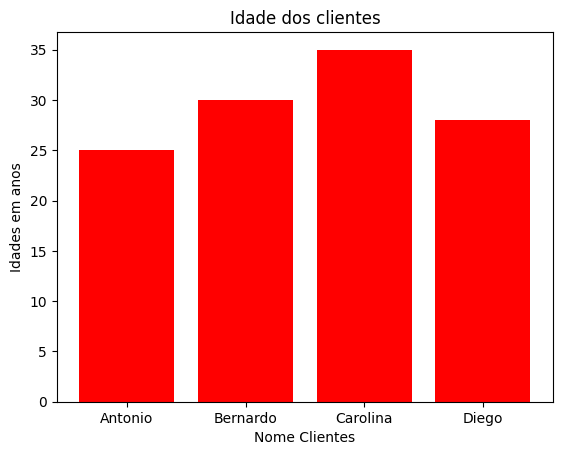

In [11]:
nome = df_funcionarios['Nome']
idade = df_funcionarios['Idade']

plt.bar(nome, idade, color='r')
#sns.barplot(x='Nome', y= 'Idade', data=df_funcionarios, color='b')
plt.title('Idade dos clientes')
plt.xlabel('Nome Clientes')
plt.ylabel('Idades em anos')
#plt.savefig('Grafico_Idade.pdf')
plt.show()

In [3]:
# 2- Adicionando a colouna Faixa Etaria

df_funcionarios["Faixa_Etaria"] = df_funcionarios["Idade"].apply(lambda x: "Jovem" if x < 30 else "Adulto")
df_funcionarios


,Nome,Idade,Cidade,Salário,Faixa_Etaria
0,Antonio,25,São Paulo,3500,Jovem
1,Bernardo,30,Rio de Janeiro,4200,Adulto
2,Carolina,35,Belo Horizonte,3700,Adulto
3,Diego,28,São Paulo,3100,Jovem


In [4]:
# 3- Aplicando o aumento de 10% no salário

df_funcionarios['Salário'] = df_funcionarios['Salário'].apply(lambda x: (x * 10)/100 + x)
df_funcionarios

,Nome,Idade,Cidade,Salário,Faixa_Etaria
0,Antonio,25,São Paulo,3850.0,Jovem
1,Bernardo,30,Rio de Janeiro,4620.0,Adulto
2,Carolina,35,Belo Horizonte,4070.0,Adulto
3,Diego,28,São Paulo,3410.0,Jovem


## 🗓️ **Exercício 2: Datas no Pandas**

### O que você vai fazer:
1. Crie um DataFrame com duas colunas: Nome e Data_Nascimento.
   ```plaintext
   Nome: Antonio, Bernardo, Carolina, Diego
   Data_Nascimento: 1998-06-15, 1993-09-21, 1988-11-03, 1995-03-12
   ```
2. Converta a coluna `Data_Nascimento` para o formato de **datas do Pandas** usando `pd.to_datetime`.  
3. Extraia o **ano de nascimento** e crie uma nova coluna chamada `Ano_Nascimento`.  
4. Crie mais uma coluna chamada `Mes_Dia` que contenha apenas o mês e o dia, no formato `MM-DD`.  

Dica: Para formatar datas, você pode usar `.strftime`.

In [5]:
# 1- Criação do dataframe

df_aniversario = pd.DataFrame ({"Nome": ["Antonio", "Bernardo", "Carolina", "Diego"],
          "Data_Nascimento": ["1998-06-15", "1993-09-21", "1988-11-03", "1995-03-12"]
          })

df_aniversario


,Nome,Data_Nascimento
0,Antonio,1998-06-15
1,Bernardo,1993-09-21
2,Carolina,1988-11-03
3,Diego,1995-03-12


In [6]:
# 2- Converter coluna Data_Nascimento para formato datas do pandas

df_aniversario["Data_Nascimento"] = pd.to_datetime(df_aniversario['Data_Nascimento'])
df_aniversario


,Nome,Data_Nascimento
0,Antonio,1998-06-15
1,Bernardo,1993-09-21
2,Carolina,1988-11-03
3,Diego,1995-03-12


In [7]:
# 3- Extrair Ano de Nascimento

df_aniversario["Ano Nascimento"] = df_aniversario["Data_Nascimento"].dt.year
df_aniversario


,Nome,Data_Nascimento,Ano Nascimento
0,Antonio,1998-06-15,1998
1,Bernardo,1993-09-21,1993
2,Carolina,1988-11-03,1988
3,Diego,1995-03-12,1995


In [8]:
# 4- Criar coluna Mês/dia no formato MM/DD

df_aniversario["Mês_Dia"] = df_aniversario["Data_Nascimento"].dt.strftime("%m-%d")
df_aniversario


,Nome,Data_Nascimento,Ano Nascimento,Mês_Dia
0,Antonio,1998-06-15,1998,06-15
1,Bernardo,1993-09-21,1993,09-21
2,Carolina,1988-11-03,1988,11-03
3,Diego,1995-03-12,1995,03-12


## 📊 **Exercício 3: Agrupamentos e Pivot Tables**

### O que você vai fazer:
1. Crie um DataFrame com dados de vendas:
   ```plaintext
   Produto: Produto1, Produto2, Produto3, Produto4, Produto5, Produto6
   Categoria: A, B, A, B, A, B
   Valor: 500, 700, 200, 400, 800, 300
   Vendedor: Antonio, Bernardo, Antonio, Diego, Carolina, Bernardo
   Mês: Janeiro, Janeiro, Fevereiro, Fevereiro, Janeiro, Fevereiro
   ```
2. Use o `groupby` para somar os valores (`Valor`) por **Categoria**.
3. Crie uma tabela dinâmica (usando `pivot_table`) que mostre as vendas totais por **Mês** e **Vendedor**.

Dica: Não se preocupe com valores faltantes, o `pivot_table` pode lidar com isso facilmente usando `fill_value=0`.

In [9]:
# 1- Criação do dataframe

df_vendas = pd.DataFrame({"Produto": ["Produto1", "Produto2", "Produto3", "Produto4", "Produto5", "Produto6"],
                          "Categoria": ["A", "B", "A", "B", "A", "B"],
                          "Valor": [500, 700, 200, 400, 800, 300],
                          "Vendedor": ["Antonio", "Bernardo", "Antonio", "Diego", "Carolina", "Bernardo"],
                          "Mês": ["Janeiro", "Janeiro", "Fevereiro", "Fevereiro", "Janeiro", "Fevereiro"]
                          })
df_vendas


,Produto,Categoria,Valor,Vendedor,Mês
0,Produto1,A,500,Antonio,Janeiro
1,Produto2,B,700,Bernardo,Janeiro
2,Produto3,A,200,Antonio,Fevereiro
3,Produto4,B,400,Diego,Fevereiro
4,Produto5,A,800,Carolina,Janeiro
5,Produto6,B,300,Bernardo,Fevereiro


In [10]:
# 2- Usar Groupby para somar os valores

df_vendas.groupby("Categoria")["Valor"].sum()


Categoria
A    1500
B    1400
Name: Valor, dtype: int64

In [11]:
# 3- Criação da tabela dinâmica usando Pivot

df_vendas.pivot_table(values="Valor", index="Mês", columns="Vendedor", aggfunc="sum", fill_value= 0)


Vendedor,Antonio,Bernardo,Carolina,Diego
Mês,,,,
Fevereiro,200,300,0,400
Janeiro,500,700,800,0


## 🔗 **Exercício 4: Juntando tabelas com `merge`**

### O que você vai fazer:
1. Crie dois DataFrames:
   - **Clientes**:
     ```plaintext
     ClienteID: 1, 2, 3
     Nome: Antonio, Bernardo, Diego
     Cidade: São Paulo, Rio de Janeiro, Belo Horizonte
     ```
   - **Compras**:
     ```plaintext
     CompraID: 101, 102, 103, 104
     ClienteID: 1, 2, 3, 1
     Produto: Produto1, Produto2, Produto3, Produto4
     Valor: 500, 700, 300, 400
     ```
2. Combine essas tabelas usando `merge` para ligar os clientes às suas compras, com base no campo `ClienteID`.
3. Calcule o total gasto por cada cliente e crie uma tabela com o nome do cliente e o valor total.

In [12]:
# 1- Criação do dataframe 1 (Clientes)

df_Clientes = pd.DataFrame({"ClienteID": [1, 2, 3],
                            "Nome": ["Antonio", "Bernardo", "Diego"],
                            "Cidade": ["São Paulo", "Rio de Janeiro", "Belo Horizonte"]
                            })

df_Clientes


,ClienteID,Nome,Cidade
0,1,Antonio,São Paulo
1,2,Bernardo,Rio de Janeiro
2,3,Diego,Belo Horizonte


In [13]:
# 1- Criação do dataframe 2 (Compras)

df_Compras = pd.DataFrame({"CompraID": [101, 102, 103, 104],
                           "ClienteID": [1, 2, 3, 1],
                           "Produto": ["Produto1", "Produto2", "Produto3", "Produto4"],
                           "Valor": [500, 700, 300, 400]
                           })

df_Compras


,CompraID,ClienteID,Produto,Valor
0,101,1,Produto1,500
1,102,2,Produto2,700
2,103,3,Produto3,300
3,104,1,Produto4,400


In [14]:
# 2- Combinando tabelas com Merge

clientes_compras = pd.merge(df_Clientes, df_Compras, on="ClienteID", how= "inner")
clientes_compras

,ClienteID,Nome,Cidade,CompraID,Produto,Valor
0,1,Antonio,São Paulo,101,Produto1,500
1,1,Antonio,São Paulo,104,Produto4,400
2,2,Bernardo,Rio de Janeiro,102,Produto2,700
3,3,Diego,Belo Horizonte,103,Produto3,300


In [15]:
# 3- Calcular total gasto por cada cliente

total_gasto_por_cliente = clientes_compras.groupby("Nome")["Valor"].sum()
total_gasto_por_cliente


Nome
Antonio     900
Bernardo    700
Diego       300
Name: Valor, dtype: int64

# **Desafio: 🔒 Gerador de Senhas Personalizadas**


Você está criando um sistema que gera senhas personalizadas para os usuários com base em suas informações pessoais. As senhas precisam ser únicas e seguras, mas também fáceis de lembrar.

1. **Crie um programa que peça ao usuário seu nome e uma data**. O programa deve gerar uma senha usando a seguinte lógica:
   - As 3 primeiras letras do nome.
   - Os dois primeiros dígitos do ano.
   - O número de caracteres do nome completo (incluindo espaços).

   **Exemplo**: Para um usuário chamado "Diego Beatriz Costa" e "15/08/1990", a senha seria: `Diego19 18`.

2. **Modifique o programa para transformar as letras da senha gerada em letras maiúsculas e adicionar um caractere especial "!" no final da senha**.

   **Exemplo modificado**: A senha final seria: `Diego19 18!`.


In [16]:
# 1- Função para gerar a senha

nome = input("Digite seu nome completo, por favor: ")
data = input("Agora digite a data de seu nascimento no formato DD/MM/AAAA: ")

def gerar_senha():
    letras_nome = nome[:3]
    ano = data.split("/")[-1]
    digitos_ano = ano[:2]
    numero_nome = len(nome)
    
    senha_inicial = f"{letras_nome}{digitos_ano} {numero_nome}"

    senha_modificada = senha_inicial.upper() + "!"
    return senha_modificada

gerar_senha()


'DIE19 19!'

In [17]:
# Função para gerar a senha com Pandas

from datetime import datetime

nome = input("Digite seu nome completo, por favor: ")
data = input("Agora digite a data de seu nascimento no formato DD/MM/AAAA: ")

def gerar_senha(nome, data):
    letras_nome = nome[:3]
    ano = datetime.strptime(data, "%d/%m/%Y")
    digitos_ano = str(ano.year)[:2]
    numero_nome = len(nome)

    senha_inicial = f"{letras_nome}{digitos_ano} {numero_nome}"

    senha_modificada = senha_inicial.upper() + "!"
    
    return senha_modificada

# Criar um DataFrame com os dados
df_gerar_senha = pd.DataFrame({"Nome": [nome], 
                               "Data": [data]
                               })

# Aplicar a função gerar_senha e adicionar a coluna de senhas ao DataFrame
df_gerar_senha["Senha"] = df_gerar_senha.apply(lambda row: gerar_senha(row["Nome"], row["Data"]), axis=1)

# Mostrar a senha gerada
print(df_gerar_senha[["Nome", "Senha"]])


                  Nome      Senha
0  Diego Beatriz Costa  DIE19 19!
